<a href="https://colab.research.google.com/github/blenbk/Economic-modelling/blob/main/Modelling_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Minimum value of y: 2.0


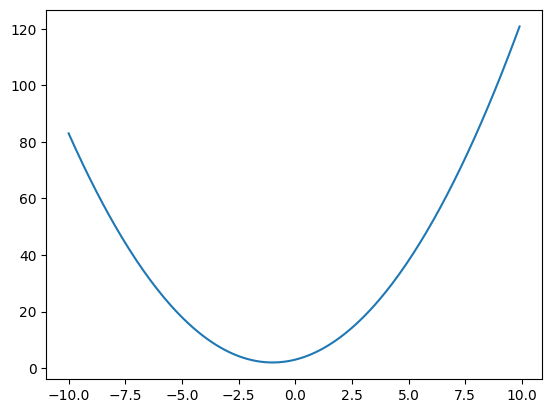

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = x**2 + 2*x + 3

plt.plot(x, y)
min_y = np.min(y)
print("Minimum value of y:", min_y)

In [ ]:
# below is just the version we did in class, the next one is for the exam
import random
class Card:
    SUITS = ["♣", "♦", "♥", "♠"]
    RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
    def __init__(self, rank, suit ):
        if rank not in self.RANKS:
            raise Exception(f"Invalid rank, must be one of {self.RANKS}")
        if suit not in self.SUITS:
            raise Exception(f"Invalid suit, must be one of {self.SUITS}")
        self._rank = rank
        self._suit = suit

    def __gt__(self, other):
        return self.RANKS.index(self.rank)> self.RANKS.index(other.rank)

    def __eq__(self, other):
        return self.rank == other.rank
    @property
    def suit(self):
        return self._suit
    @property
    def rank(self):
        return self._rank
    def __str__(self):
        return f"{self.rank}{self.suit}"
    def __repr__(self):
        return self.__str__()

class Deck:
    def __init__(self):
        cards = []
        # iterate over all ranks and suits, create a card and add it to the list
        for rank in Card.RANKS:
            for suit in Card.SUITS:
                card = Card(rank, suit)
                cards.append(card)
        self._cards = tuple(cards)

    @property
    def cards(self):
        return self._cards
    def __str__(self):
        return str(self._cards)
    def shuffle(self):
        # shuffles the cards in the deck
        cards = list(self._cards)
        random.shuffle(cards)
        self._cards= tuple(cards)
class Hand:
    def __init__(self, deck):
        #deck is shuffled before
        cards = []
        for i in range (5):
            cards.append(deck._cards[i])
        self._cards = tuple(cards)
    def __str__(self):
        return str(self._cards)
    @property
    def is_flush(self):
        suit = self._cards[0].suit
        for i in range(1, 5):
            if self._cards[i].suit != suit:
                return False
        return True

    @property
    def is_pair(self):
        ranks=[]
        for card in self._cards:
            ranks.append(card.rank)
        for rank in ranks:
            if ranks.count(rank) == 2:
                return True
            return False

    @property
    def is_3_kind(self):
        ranks=[]
        for card in self._cards:
            ranks.append(card.rank)
        for rank in ranks:
            if ranks.count(rank) == 3:
                return True
            return False

    @property
    def is_4_kind(self):
        ranks = []
        for card in self._cards:
            ranks.append(card.rank)
        for rank in ranks:
            if ranks.count(rank) == 4:
                return True
            return False
    @property
    def is_full_house(self):
        return self.is_3_kind and self.is_pair

    @property
    def is_2_pair(self):
        ranks = {}
        for card in self._cards:
            ranks.append(card.rank)
        ranks = set(ranks)
        return len(ranks) == 3 and not self.is_3_kind
    def sort_hand(self):
        cards= list(self._cards)
        cards.sort()
        print(f"sorted hand is: {cards}")

    @property
    def is_straight(self):
        cards = list(self._cards)
        cards.sort()
        distance = cards[4].RANKS.index(cards[4].rank) - Card.RANKS.index(cards[0].rank)
        return distance == 4 and not self.is_pair and not self.is_3_kind

precision = tries =  10
i = 0
while True:
    i = i+1
    d = Deck()
    d.shuffle()
    hand = Hand(d)
    if hand.is_straight:
        tries -= 1

    if tries==0:
        break

probability = precision/i * 100
print(f"The odds of getting a flush are {probability}%")

d = Deck()
d.shuffle ()
hand = Hand(d)
print(hand)
hand.sort_hand ()


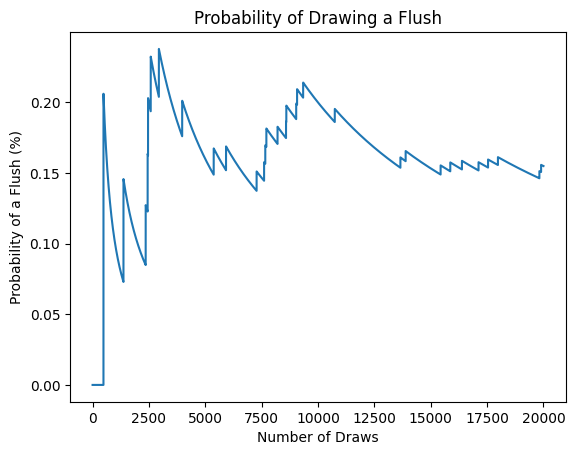

The final probability of drawing a Flush after 20000 iterations: 0.15%


In [ ]:
import random
import matplotlib.pyplot as plt

class Card:
    SUITS = ["♣", "♦", "♥", "♠"]
    RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]

    def __init__(self, rank, suit):
        if rank not in self.RANKS:
            raise Exception(f"Invalid rank, must be one of {self.RANKS}")
        if suit not in self.SUITS:
            raise Exception(f"Invalid suit, must be one of {self.SUITS}")
        self._rank = rank
        self._suit = suit

    def __str__(self):
        return f"{self._rank}{self._suit}"

class Deck:
    def __init__(self):
        cards = [Card(rank, suit) for rank in Card.RANKS for suit in Card.SUITS]
        self._cards = cards

    def shuffle(self):
        random.shuffle(self._cards)

    def deal_hand(self, size):
        return random.sample(self._cards, size)

class Hand:
    def __init__(self, cards):
        self._cards = cards

    def is_flush(self):
        suits = [card._suit for card in self._cards]
        return len(set(suits)) == 1

# Initialize variables
num_iterations = 20000
flush_count = 0
flush_probabilities = []

# Run the simulation
for i in range(1, num_iterations + 1):
    deck = Deck()
    deck.shuffle()
    hand = Hand(deck.deal_hand(5))

    if hand.is_flush():
        flush_count += 1

    flush_probability = (flush_count / i) * 100
    flush_probabilities.append(flush_probability)

# Plot the results
plt.plot(range(1, num_iterations + 1), flush_probabilities)
plt.xlabel('Number of Draws')
plt.ylabel('Probability of a Flush (%)')
plt.title('Probability of Drawing a Flush')
plt.show()

# Print the final computed probability of drawing a Flush
final_flush_probability = (flush_count / num_iterations) * 100
print(f"The final probability of drawing a Flush after {num_iterations} iterations: {final_flush_probability:.2f}%")

In [ ]:
class Deck:
    def __init__(self):
        cards = []
        # iterate over all ranks and suits, create a card and add it to the list
        for rank in Card.RANKS:
            for suit in Card.SUITS:
                card = Card(rank, suit)
                cards.append(card)
        self._cards = tuple(cards)

    @classmethod
    def create_shuffled_deck(cls):
        """
        Create a new shuffled deck of cards.

        This class method creates a new instance of the Deck class with cards arranged
        in a random order. It shuffles the cards and returns the shuffled deck.

        Returns:
        Deck: A shuffled deck of cards.
        """
        deck = cls()  # creates a new instance of the Deck class
        deck.shuffle()  # shuffles the cards in the deck
        return deck

In [ ]:
import numpy as np

a = np.arange(0, 12)
a = a.reshape(4, 3)  # Reshape to a 4x3 matrix

# Add the desired values to each element
a = np.array([[1, 6, 11],
               [16, 21, 26],
               [31, 36, 41],
               [46, 51, 56]])

print(a)

[[ 1  6 11]
 [16 21 26]
 [31 36 41]
 [46 51 56]]


In [ ]:
class MyClass:
    def __init__(self, x):
        self.x = x

    def regular_method(self):
        return f"Regular method called with x = {self.x}"

    def __str__(self):
        return f"Magic method __str__ called with x = {self.x}"


obj = MyClass(5)

# Calling a regular method
print(obj.regular_method())  # Output: Regular method called with x = 5

# Using a magic method implicitly (invoked when calling str() function)
print(str(obj))  # Output: Magic method __str__ called with x = 5

Regular method called with x = 5
Magic method __str__ called with x = 5


[*********************100%%**********************]  1 of 1 completed


Number of rows in the dataframe: 49
Column names: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Highest stock value on April 5th: 170.86000061035156


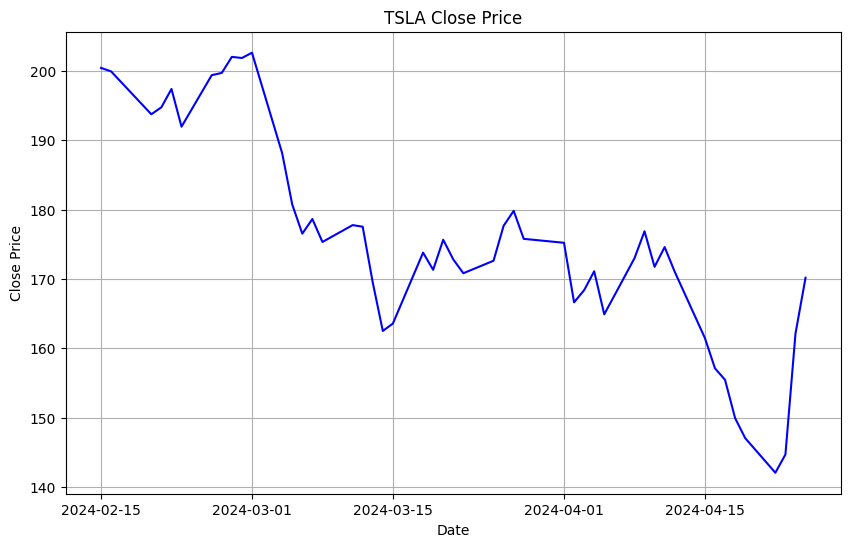

In [ ]:
from matplotlib import pylab as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import yfinance as yfin
yfin.pdr_override()

today = datetime.datetime.today()
formatted_date = today.strftime("%Y-%m-%d")
df1 = web.DataReader('TSLA', start='2024-02-15', end=formatted_date)
df1.index = pd.to_datetime(df1.index)
print("Number of rows in the dataframe:", len(df1))
print("Column names:", df1.columns)
highest_value_april_5th = df1.loc['2024-04-05', 'High']
print("Highest stock value on April 5th:", highest_value_april_5th)
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Close'], color='blue')
plt.title('TSLA Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(4, 4), index=[1, 2, 3, 4], columns=['a', 'b', 'c', 'd'])
print(df)
print("Using index:", df['c'][2])
print("Using loc:", df.loc[2, 'c'])
print("Using iloc:", df.iloc[1, 2])

          a         b         c         d
1 -0.270836 -2.504401  0.031269 -1.446708
2  1.136973 -0.006544 -1.232332 -1.324586
3 -0.395952  0.447581 -1.983261 -0.305043
4  0.809582  0.514669  0.896316 -1.037343
Using index: -1.2323324660683932
Using loc: -1.2323324660683932
Using iloc: -1.2323324660683932
